# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [26]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [28]:
# Set up Splinter
browser = Browser("chrome")

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [30]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [100]:
# Confirm DataFrame was created successfully
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [36]:
df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [38]:
df.set_index('id', inplace=True)
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [40]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [46]:
# Scrape the table
table = mars_soup.find('table')
rows = table.find_all('row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [50]:
# Create an empty list to store data
data = []

In [74]:
print(df.head())

   terrestrial_date  sol   ls  month  min_temp  pressure
id                                                      
2        2012-08-16   10  155      6     -75.0     739.0
13       2012-08-17   11  156      6     -76.0     740.0
24       2012-08-18   12  156      6     -76.0     741.0
35       2012-08-19   13  157      6     -74.0     732.0
46       2012-08-20   14  157      6     -74.0     740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [104]:
# Examine the data types of each column
print(df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [108]:
# Convert 'terrestrial date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'month', and 'pressure' to integers
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'ls' and 'min_temp' to float (since they may contain decimal values)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Verify changes
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [110]:
# 1. How many months exist on Mars?
num_mars_months = df['month'].unique().size
print(f"Number of months on Mars: {num_mars_months}")

Number of months on Mars: 12


In [112]:
# 2. How many Martian (sol) days worth of data are there?
num_sol_days = df['sol'].unique().size
print(f"Number of Martian days (sols) in dataset: {num_sol_days}")

Number of Martian days (sols) in dataset: 1867


In [114]:
# 3. What is the average minimum temperature by month? PART A
# Group by month and calculate the mean of min_temp
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


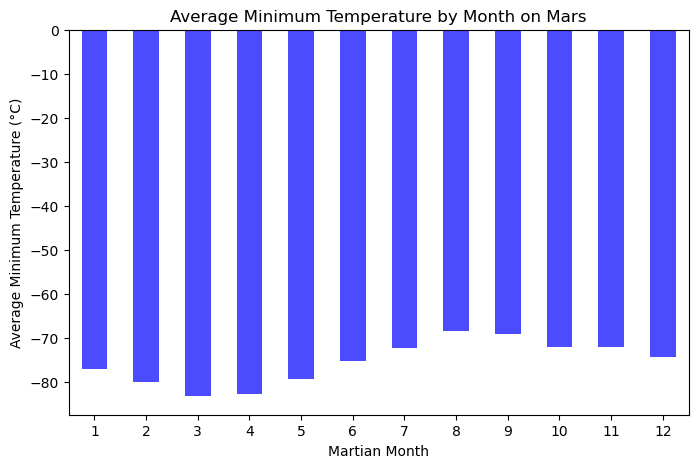

In [116]:
# 3. What is the average minimum temperature by month? PART B
# Create the bar chart
plt.figure(figsize=(8, 5))
avg_min_temp_by_month.plot(kind='bar', color='blue', alpha=0.7)

# Labels and title
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Month on Mars")
plt.xticks(rotation=0)  # Keep x-axis labels readable

# Show the plot
plt.show()

In [130]:
# 3 ANSWER
print(f"Warmest Martian Month: Month 8 at -68.382979°C")
print(f"Coldest Martian Month: Month 3 at -83.307292°C")

Warmest Martian Month: Month 8 at -68.382979°C
Coldest Martian Month: Month 3 at -83.307292°C


In [132]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? PART A
# Group by month and calculate the mean of pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the results
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


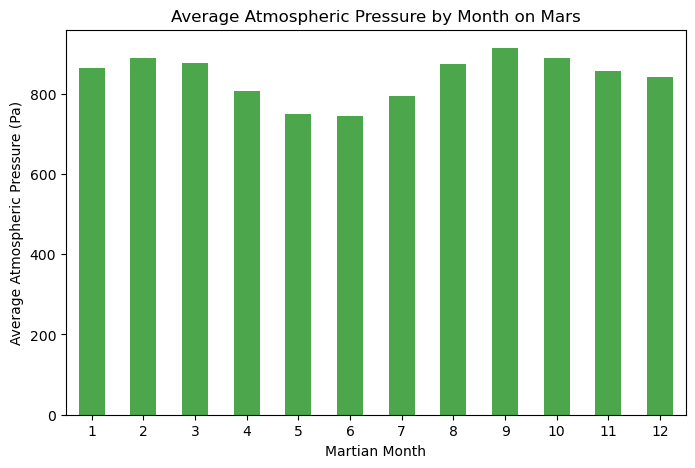

In [134]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? PART B
# Create the bar chart
plt.figure(figsize=(8, 5))
avg_pressure_by_month.plot(kind='bar', color='green', alpha=0.7)

# Labels and title
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Month on Mars")
plt.xticks(rotation=0)  # Keep x-axis labels readable

# Show the plot
plt.show()

In [136]:
# 4 ANSWER
print(f"Martian Month of Lowest Atmospheric Pressure: Month 6 at 745.054422 Pa")
print(f"Martian Month of Highest Atmospheric Pressure: Month 9 at 913.305970 Pa")

Martian Month of Lowest Atmospheric Pressure: Month 6 at 745.054422 Pa
Martian Month of Highest Atmospheric Pressure: Month 9 at 913.305970 Pa


Estimated number of Earth days in a Martian year: 687


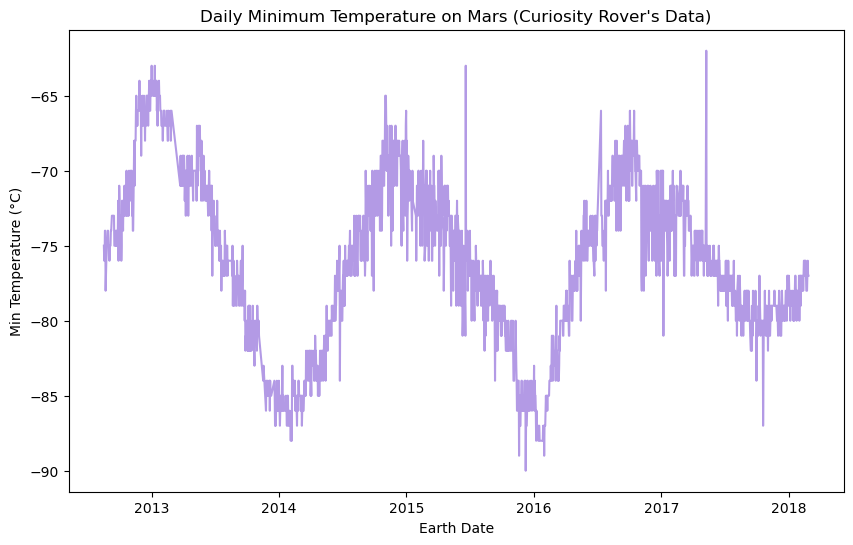

In [165]:
# 5. About how many terrestrial (Earth) days exist in a Martian year
print(f"Estimated number of Earth days in a Martian year: {earth_days_in_martian_year:.0f}")

# Plot the daily minimum temperature against the terrestrial date
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='mediumpurple', alpha=0.7)

# Labels and title
plt.xlabel("Earth Date")
plt.ylabel("Min Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars (Curiosity Rover's Data)")

# Show the plot
plt.show()

#### Minimum Temperature

As previously stated in question 3, the bar chart depicts that Month 3 is the Minimum Temparture at -83.307292°C

#### Atmospheric Pressure
Martian Month of Lowest Atmospheric Pressure: Month 6 at 745.054422 Pa

Martian Month of Highest Atmospheric Pressure: Month 9 at 913.305970 Pa

#### Year Length

1 Martian Year = 687 Earth days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [172]:
browser.quit()